**Description**: Analyze accuracies for $m = 100, n = 200$.

**Estimated runtime**: ~1 hour. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 200

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

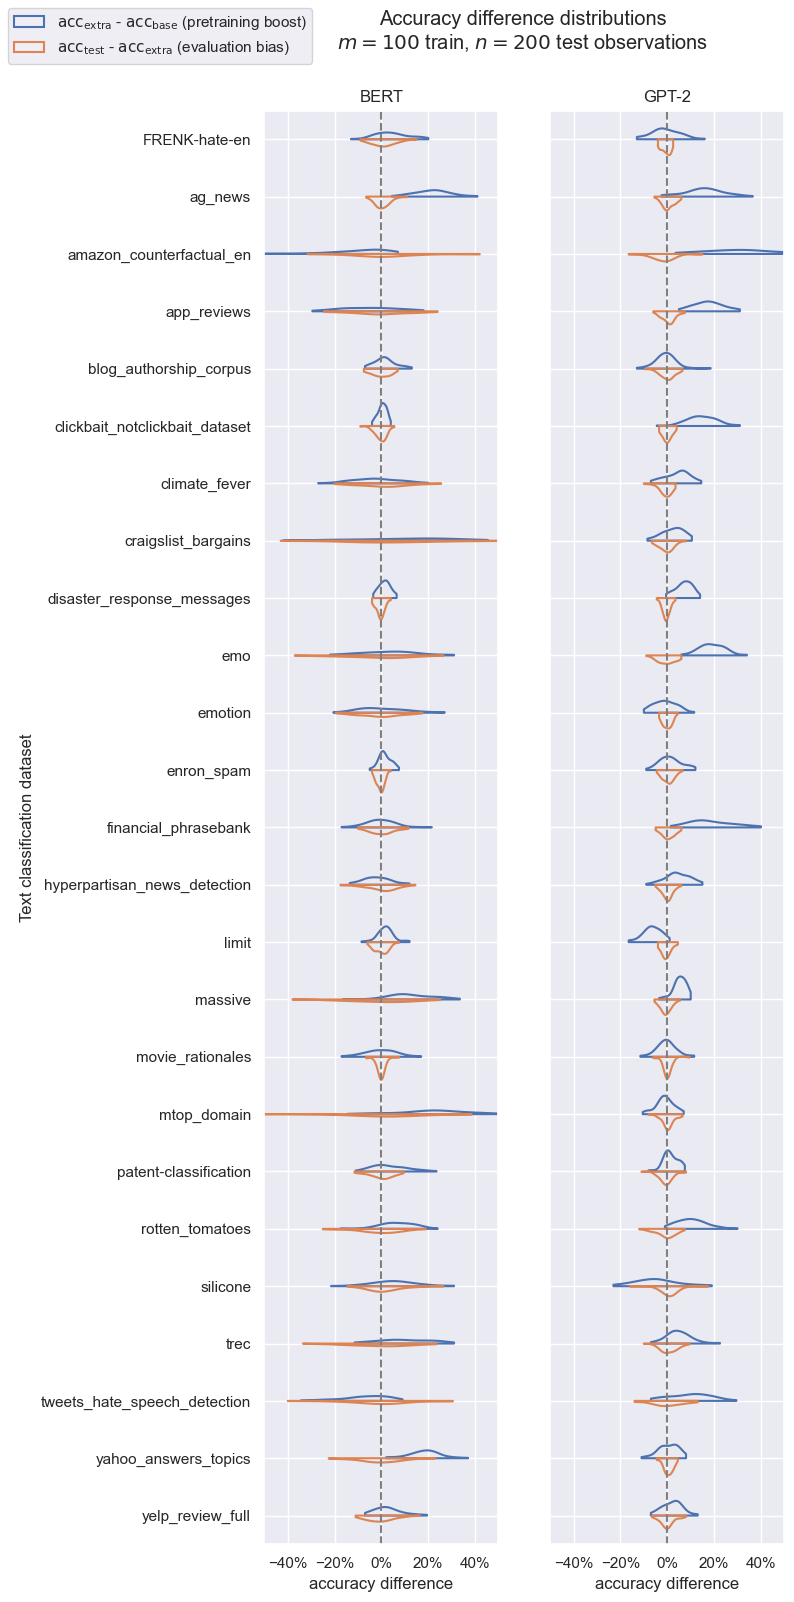

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Pretraining boost

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.051792 ┆ 0.010042 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.235303 ┆ 0.055126 │
└──────────┴──────────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",0.0182,0.010062
"""ag_news""",0.1875,0.011937
"""amazon_counterfactual_en""",0.111,0.036631
"""app_reviews""",0.06375,0.020738
"""blog_authorship_corpus""",0.00485,0.00682
…,…,…
"""silicone""",0.0032,0.01554
"""trec""",0.0744,0.012846
"""tweets_hate_speech_detection""",0.0135,0.017607
"""yahoo_answers_topics""",0.0945,0.014955


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",0.035745,0.018252
"""ag_news""",0.377502,0.030776
"""amazon_counterfactual_en""",0.458375,0.13363
"""app_reviews""",0.740728,0.157112
"""blog_authorship_corpus""",0.013204,0.013509
…,…,…
"""silicone""",0.013991,0.032809
"""trec""",0.38219,0.094856
"""tweets_hate_speech_detection""",0.04546,0.028038
"""yahoo_answers_topics""",0.743593,0.116018


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 948 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.10386,0.14467,-0.11766,0.33261,0.00325,0.00253,2027.26372,2329.37462,1.00050
1|dataset:method[FRENK-hate-en:extra],-0.09303,0.14363,-0.31391,0.14247,0.00320,0.00226,2058.93699,2269.22596,1.00051
1|dataset:method[ag_news:base],-0.26770,0.14212,-0.49354,-0.04798,0.00268,0.00195,2812.19873,2517.05656,1.00090
1|dataset:method[ag_news:extra],0.28588,0.14130,0.06965,0.51575,0.00271,0.00201,2739.92375,2495.16959,1.00155
1|dataset:method[amazon_counterfactual_en:base],-0.12054,0.14414,-0.34154,0.11953,0.00296,0.00215,2368.03806,2444.23234,1.00147
1|dataset:method[amazon_counterfactual_en:extra],0.15911,0.14424,-0.07206,0.38716,0.00309,0.00218,2180.90915,2495.42411,1.00180
1|dataset:method[app_reviews:base],-0.05348,0.14220,-0.30177,0.15415,0.00290,0.00215,2411.22831,2677.11035,1.00095
1|dataset:method[app_reviews:extra],0.00756,0.14105,-0.20193,0.24555,0.00283,0.00204,2484.48272,2825.77175,1.00125
1|dataset:method[blog_authorship_corpus:base],0.13367,0.14357,-0.08973,0.35732,0.00284,0.00204,2558.78263,2554.29143,1.00088
1|dataset:method[blog_authorship_corpus:extra],-0.12344,0.14287,-0.36206,0.08633,0.00278,0.00199,2635.06786,2763.74277,0.99973


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


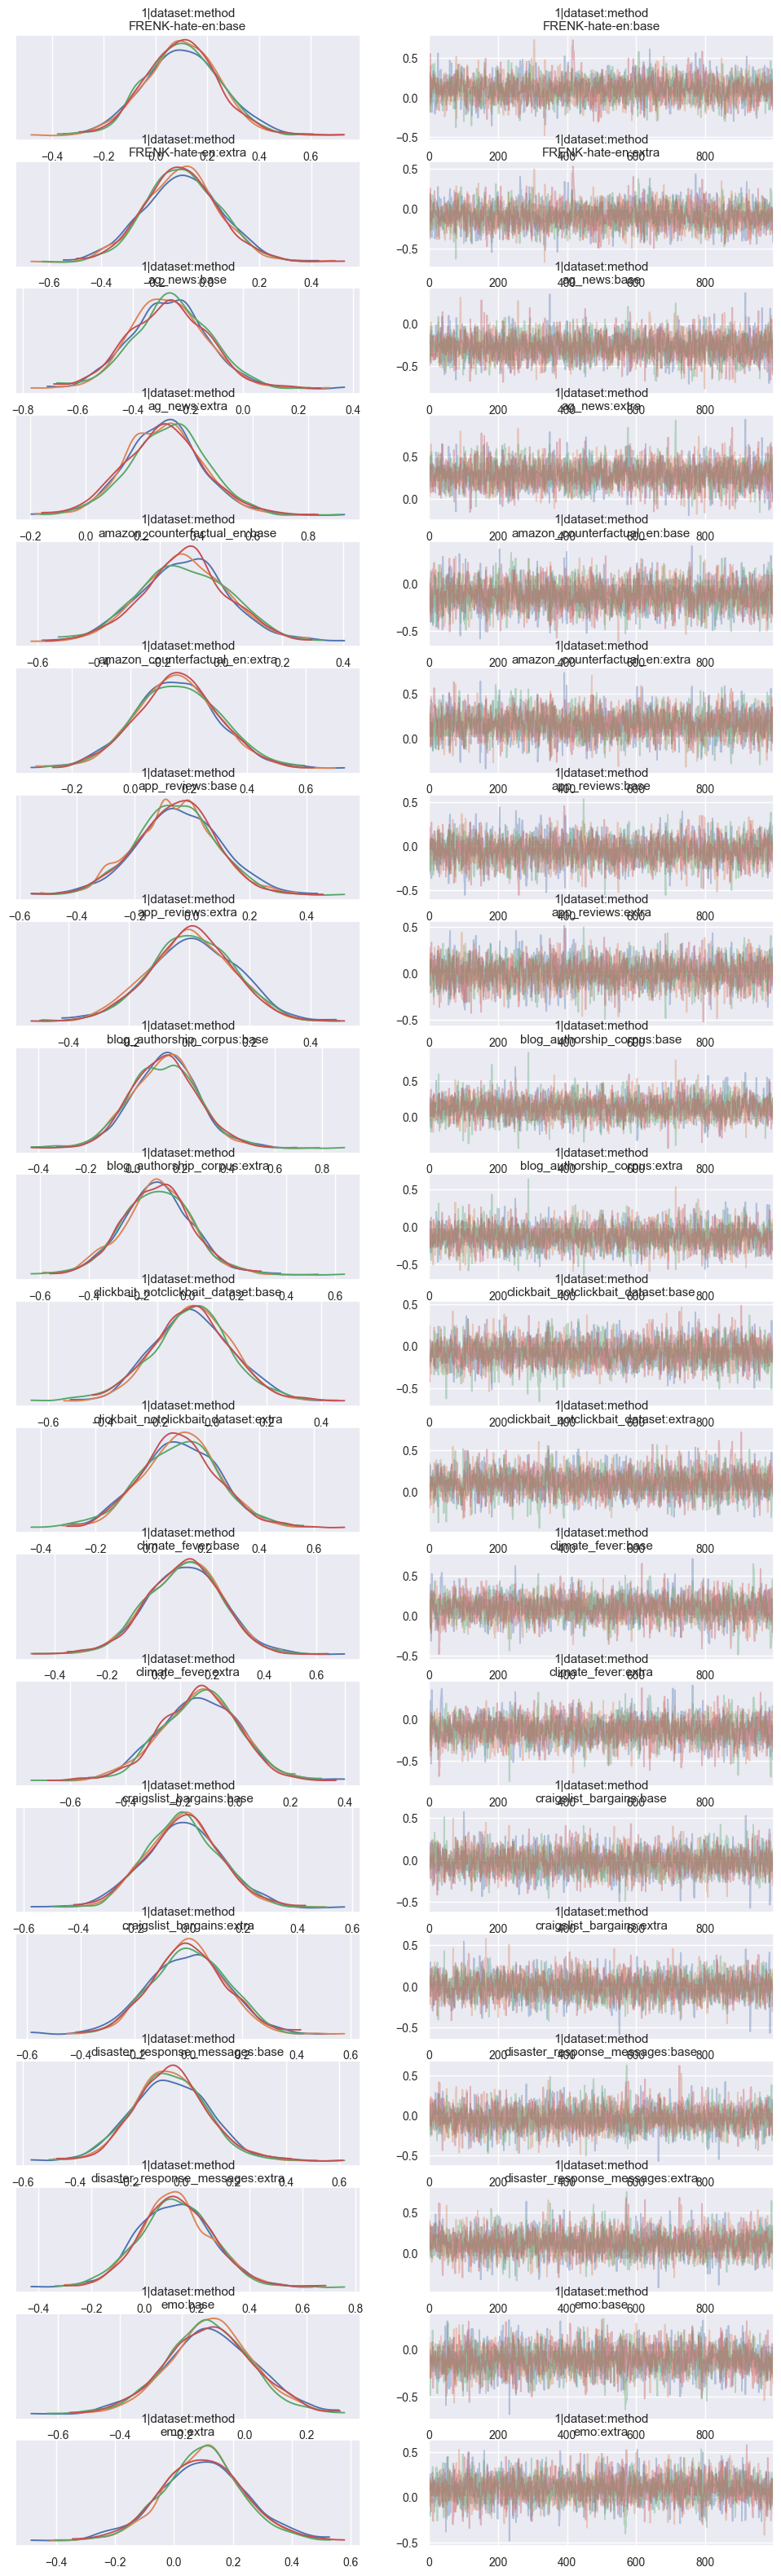

In [10]:
model_boost, summary_boost, az_summary_boost = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.001576 ┆ 0.001397 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.026874 ┆ 0.008195 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.002,0.005443
"""ag_news""",0.00565,0.004078
"""amazon_counterfactual_en""",0.00615,0.01735
"""app_reviews""",0.0051,0.012106
"""blog_authorship_corpus""",-0.00035,0.005003
…,…,…
"""silicone""",0.01215,0.008875
"""trec""",0.00025,0.013541
"""tweets_hate_speech_detection""",0.0022,0.015278
"""yahoo_answers_topics""",-0.0002,0.009228


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.00517,0.009334
"""ag_news""",0.009477,0.005923
"""amazon_counterfactual_en""",0.034038,0.034262
"""app_reviews""",0.055319,0.048778
"""blog_authorship_corpus""",0.001789,0.009414
…,…,…
"""silicone""",0.032036,0.018091
"""trec""",0.039973,0.036217
"""tweets_hate_speech_detection""",0.014504,0.023923
"""yahoo_answers_topics""",0.027456,0.032834


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 921 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00098,0.01588,-0.02520,0.02543,0.00024,0.00022,4568.14446,3516.25570,1.00073
1|dataset:method[FRENK-hate-en:test],0.00097,0.01572,-0.02457,0.02567,0.00023,0.00023,4849.00909,3140.20946,1.00229
1|dataset:method[ag_news:extra],-0.00655,0.01633,-0.03108,0.02013,0.00022,0.00022,5424.34590,3622.73268,1.00055
1|dataset:method[ag_news:test],0.00653,0.01652,-0.01939,0.03302,0.00022,0.00022,5580.09844,3224.31930,1.00118
1|dataset:method[amazon_counterfactual_en:extra],-0.00762,0.01656,-0.03400,0.01762,0.00022,0.00021,5849.01027,3702.19041,0.99987
1|dataset:method[amazon_counterfactual_en:test],0.00761,0.01644,-0.01906,0.03277,0.00022,0.00022,5816.16820,3206.00389,1.00104
1|dataset:method[app_reviews:extra],-0.00527,0.01625,-0.03033,0.02089,0.00021,0.00023,5788.88144,2994.80077,1.00226
1|dataset:method[app_reviews:test],0.00495,0.01614,-0.02130,0.02946,0.00024,0.00025,4638.19441,2661.85759,1.00478
1|dataset:method[blog_authorship_corpus:extra],0.00301,0.01595,-0.02303,0.02754,0.00023,0.00023,4981.95590,3160.50615,1.00193
1|dataset:method[blog_authorship_corpus:test],-0.00260,0.01542,-0.02536,0.02379,0.00021,0.00020,5482.60078,3349.62970,1.00028


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


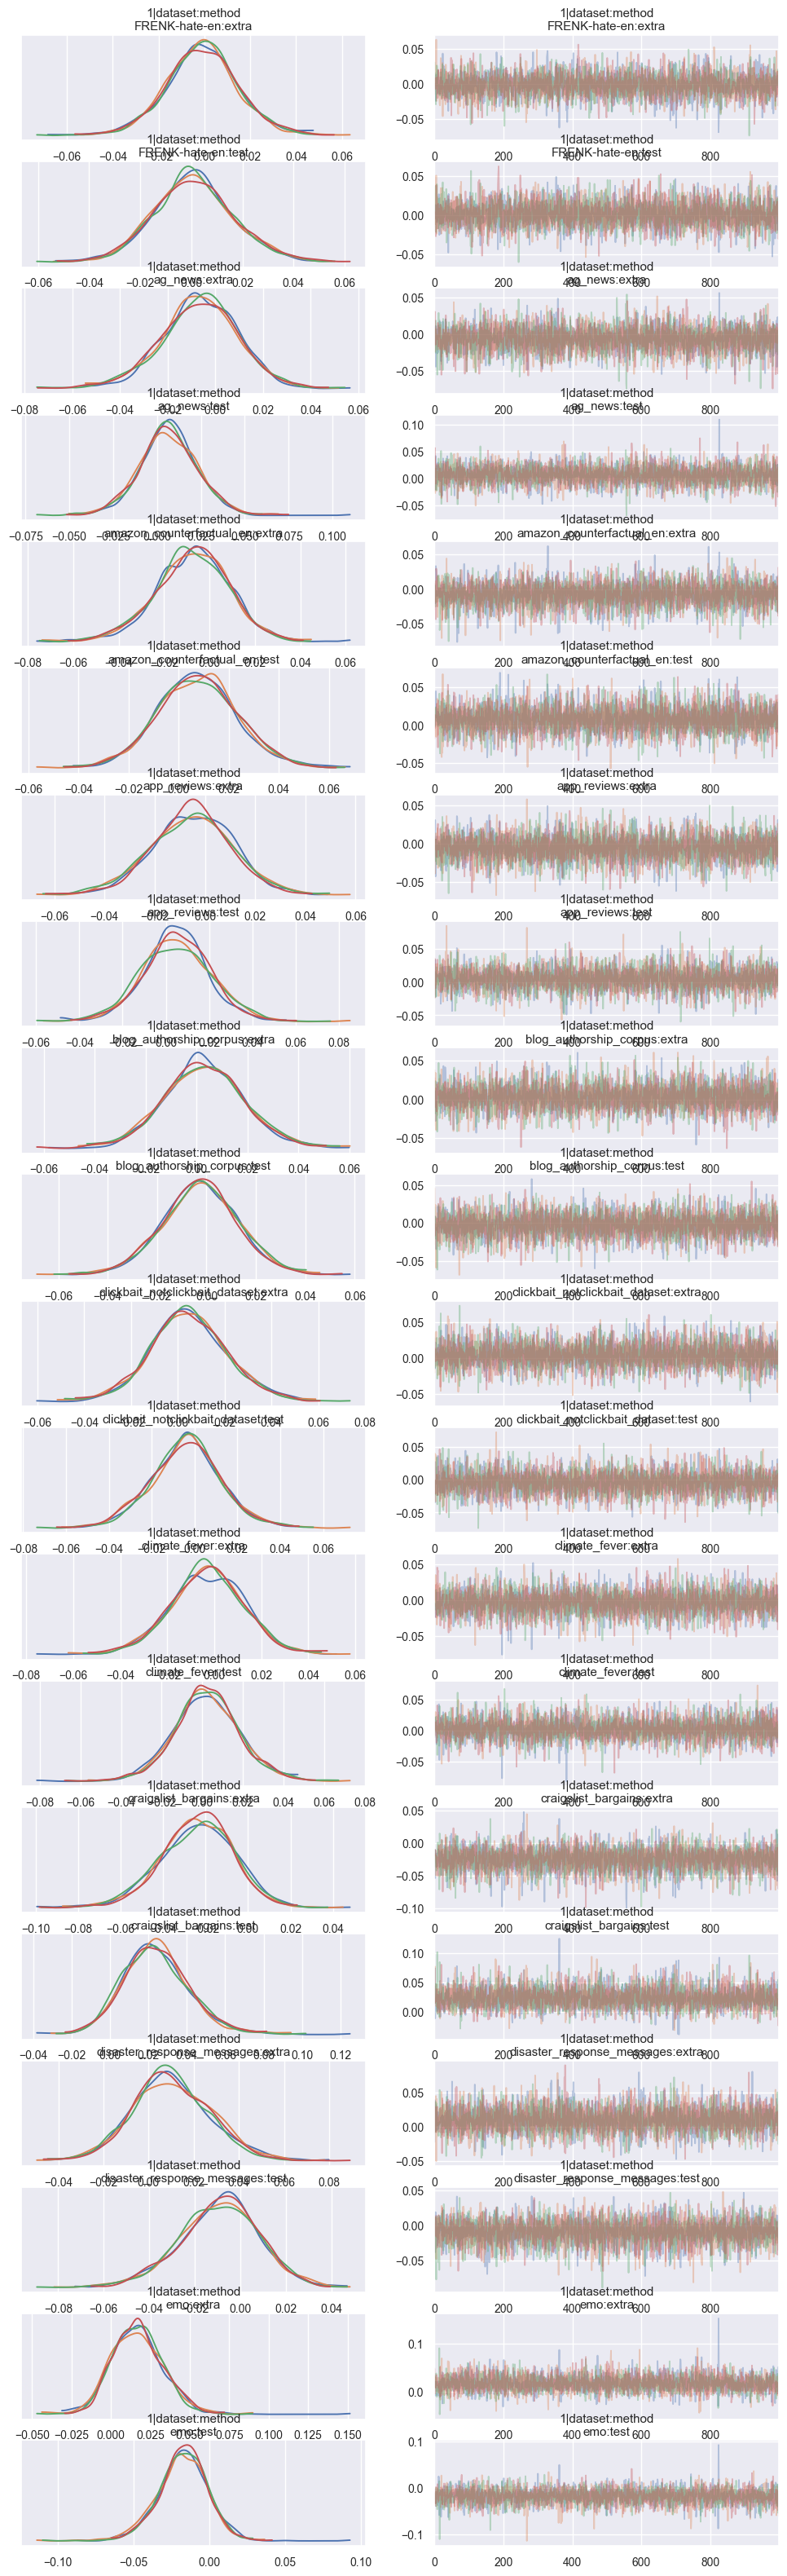

In [15]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 5000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/m100/main_m100_n200_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/m100/main_m100_n200_bias.nc'